In [1]:
# Import useful libraries
import cv2
import random
import numpy as np
import pickle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import time
import glob
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# Load pickled original data
training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# verfiy that the number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))


Number of total images in the original dataset = 51839
Number of total labels in the original dataset = 51839
Minimum number of labels in the original dataset = 270
Maximum number of labels in the original dataset = 3000


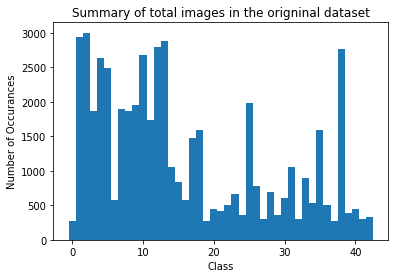

Number of training examples in the original dataset = 34799
Number of validation examples in the original dataset = 4410
Number of testing examples in the original dataset = 12630
Image data shape in the original dataset = (32, 32, 3)
Number of classes in the original dataset = 43


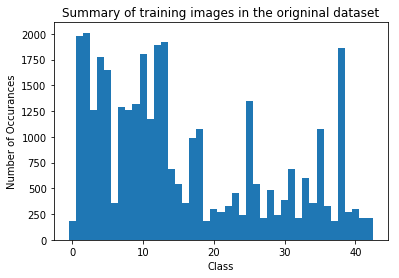

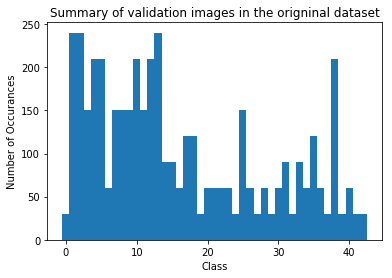

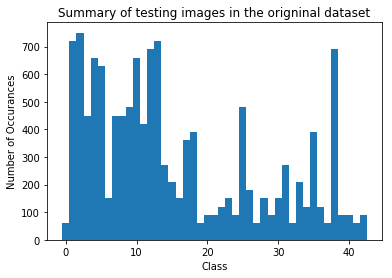

In [3]:
### Combine all the original data
X_combined = np.concatenate((X_train, X_valid, X_test), axis=0) # row wise
y_combined = np.concatenate((y_train, y_valid, y_test), axis=0) # row wise

### Summary of test data
unique1, counts1 = np.unique(y_combined, return_counts=True)

print('Number of total images in the original dataset =', len(X_combined))
print('Number of total labels in the original dataset =', len(y_combined))
print('Minimum number of labels in the original dataset =', np.min(counts1))
print('Maximum number of labels in the original dataset =', np.max(counts1))



plt.bar(unique1, counts1, 1)
plt.title('Summary of total images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

## Statistics of the original datasets
n_train = len(X_train)

# number of validation examples
n_validation = len(X_valid)

# number of testing examples.
n_test = len(X_test)

# what's the shape of an traffic sign image?
image_shape = X_train[0].shape

# how many unique classes/labels there are in the dataset.
n_classes = len(unique1)

print("Number of training examples in the original dataset =", n_train)
print("Number of validation examples in the original dataset =", n_validation)
print("Number of testing examples in the original dataset =", n_test)
print("Image data shape in the original dataset =", image_shape)
print("Number of classes in the original dataset =", n_classes)

### summary of training data
unique2, counts2 = np.unique(y_train, return_counts=True)
plt.bar(unique2, counts2, 1)
plt.title('Summary of training images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of validation data
unique3, counts3 = np.unique(y_valid, return_counts=True)
plt.bar(unique3, counts3, 1)
plt.title('Summary of validation images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of test data
unique4, counts4 = np.unique(y_test, return_counts=True)
plt.bar(unique4, counts4, 1)
plt.title('Summary of testing images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

In [3]:
# Load pickled new data

training_file = "../data/new_train_data.p"
validation_file= "../data/new_valid_data.p"
testing_file = "../data/new_test_data.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['X_train'], train['y_train']
X_valid, y_valid = valid['X_valid'], valid['y_valid']
X_test, y_test = test['X_test'], test['y_test']

# verfiy that the number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

Number of total images in the new dataset = 129000
Number of total labels in the new dataset = 129000
Minimum number of labels in the new dataset = 3000
Maximum number of labels in the new dataset = 3000


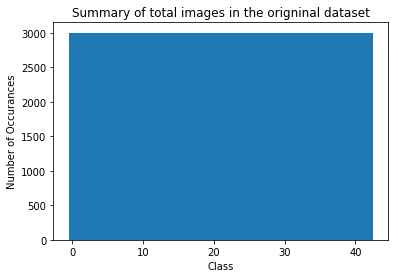

Number of training examples in the newly generated dataset = 77400
Number of validation examples in the newly generated dataset = 25800
Number of testing examples in the newly generated dataset = 25800
Image data shape in the newly generated dataset = (32, 32, 3)
Number of classes in the newly generated dataset = 43


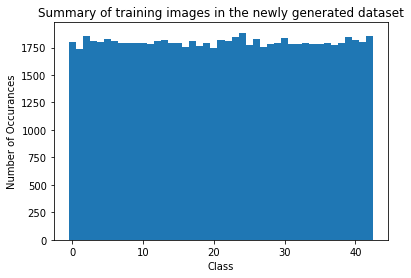

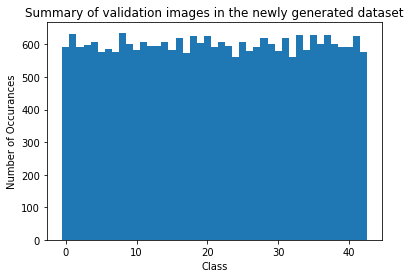

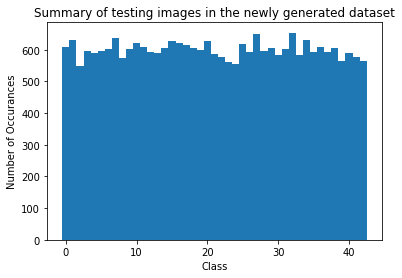

In [4]:
### Combine all the new data
X_combined = np.concatenate((X_train, X_valid, X_test), axis=0) # row wise
y_combined = np.concatenate((y_train, y_valid, y_test), axis=0) # row wise

### Summary of test data
unique1, counts1 = np.unique(y_combined, return_counts=True)

print('Number of total images in the new dataset =', len(X_combined))
print('Number of total labels in the new dataset =', len(y_combined))
print('Minimum number of labels in the new dataset =', np.min(counts1))
print('Maximum number of labels in the new dataset =', np.max(counts1))


plt.bar(unique1, counts1, 1)
plt.title('Summary of total images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()


## Statistics of the newly generated datasets
n_train = len(X_train)

# number of validation examples
n_validation = len(X_valid)

# number of testing examples.
n_test = len(X_test)

# what's the shape of an traffic sign image?
image_shape = X_train[0].shape

# how many unique classes/labels there are in the dataset.
n_classes = len(unique1)

print("Number of training examples in the newly generated dataset =", n_train)
print("Number of validation examples in the newly generated dataset =", n_validation)
print("Number of testing examples in the newly generated dataset =", n_test)
print("Image data shape in the newly generated dataset =", image_shape)
print("Number of classes in the newly generated dataset =", n_classes)

### summary of training data
unique2, counts2 = np.unique(y_train, return_counts=True)
plt.bar(unique2, counts2, 1)
plt.title('Summary of training images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of validation data
unique3, counts3 = np.unique(y_valid, return_counts=True)
plt.bar(unique3, counts3, 1)
plt.title('Summary of validation images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of test data
unique4, counts4 = np.unique(y_test, return_counts=True)
plt.bar(unique4, counts4, 1)
plt.title('Summary of testing images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

In [5]:
# sort and split images by class labels
sorted_indices = np.argsort(y_combined) # find sorted array indices
y_combined_sorted = y_combined[sorted_indices] # apply sorting to y_combined, i.e., sorted labels, e.g., 1 1 2 2 3
X_combined_sorted = X_combined[sorted_indices] 
a = y_combined_sorted[:-1] # all labels except the last label, e.g., 1 1 2 2 
b = y_combined_sorted[1:]  # all labels ecept the first label, e.g., 1 2 2 3
xx = a != b # now check where index-wise elements mis-match, e.g., False True False True
splitter = []
for i in range(len(xx)): # find the indices where labels mis-match, e.g., 1 and 3
    if xx[i] == True:
        splitter.append(i + 1) # add one because np.split(array, [x, y, z]) will split from 0 to x-1, x to y-1, and so on
splitter = np.array(splitter)        
splitted_y_combined = np.array(np.split(y_combined_sorted, splitter))
splitted_X_combined = np.array(np.split(X_combined_sorted, splitter))

In [6]:
def affine_transformaiton(image_data_x, image_data_y, angle, scale):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        angle = int(random.uniform(-angle, angle))
        transform_mat = cv2.getRotationMatrix2D((image.shape[1]/2, image.shape[0]/2), angle, scale)
        new_images_x.append(cv2.warpAffine(image, transform_mat, (image.shape[1], image.shape[0])))
        new_images_y.append(image_data_y[0])
    
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y

def flip_horizontally(image_data_x, image_data_y):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        new_images_x.append(cv2.flip(image,1)) # to flip horizontally
        new_images_y.append(image_data_y[0])
        
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y

def flip_vertically(image_data_x, image_data_y):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        new_images_x.append(cv2.flip(image,0)) # to flip horizontally
        new_images_y.append(image_data_y[0])
        
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y

def flip_both_ways(image_data_x, image_data_y):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        new_images_x.append(cv2.flip(image,-1)) # to flip horizontally and vertically
        new_images_y.append(image_data_y[0])
        
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y

def flip_90_anti_clock(image_data_x, image_data_y):
    new_images_x = []
    new_images_y = []
    for image in image_data_x:
        new_images_x.append(cv2.transpose(image)) # 90 degree anticlock-wise rotatio
        new_images_y.append(image_data_y[0])
        
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    return new_images_x, new_images_y


In [7]:
def generate_image(image_data_x, image_data_y):
    count = len(image_data_x)
    angle1 = 40
    angle2 = 60
    angle3 = 80
    angle4 = 110
    scale1 = 0.40
    scale2 = 0.60
    scale3 = 0.80
    scale4 = 1.0
    # add original data
    new_images_x = image_data_x
    new_images_y = image_data_y
    #print(len(new_images_x),len(new_images_y))
    if count <= 2000:
        # generate fake data with affine transformation
        new_x, new_y = affine_transformaiton(image_data_x, image_data_y, angle1, scale1)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
    
    if count <= 1500:
        # generate fake data with affine transformation
        new_x, new_y = affine_transformaiton(image_data_x, image_data_y, angle2, scale2)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
    if count <= 1200:
        # generate fake data with affine transformation
        new_x, new_y = affine_transformaiton(image_data_x, image_data_y, angle3, scale3)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
    if count <= 750:
        # generate fake data with affine transformation
        new_x, new_y = affine_transformaiton(image_data_x, image_data_y, angle4, scale4)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
        # flip both ways
        new_x, new_y = flip_both_ways(image_data_x, image_data_y)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
        # flip horizontally
        new_x, new_y = flip_horizontally(image_data_x, image_data_y)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
    
    if count <= 500:
        
        # flip vertically
        new_x, new_y = flip_vertically(image_data_x, image_data_y)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
        
        # flip 90 degree anti clock-wise
        new_x, new_y = flip_90_anti_clock(image_data_x, image_data_y)
        #print(len(new_x),len(new_y))
        new_images_x = np.concatenate((new_images_x, new_x), axis=0) # row wise
        new_images_y = np.concatenate((new_images_y, new_y), axis=0) # row wise
    
    new_images_x = np.array(new_images_x)
    new_images_y = np.array(new_images_y)
    
    new_images_x, new_images_y = shuffle(new_images_x, new_images_y)
    
    return new_images_x, new_images_y

In [19]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-1, 1]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    img_min = 0
    img_max = 255
    new_min = -1
    new_max = 1
    x1 = (image_data - img_min) / (img_max - img_min)
    x2 = x1 * (new_max - new_min)
    x2 = x2 + new_min
    return x2

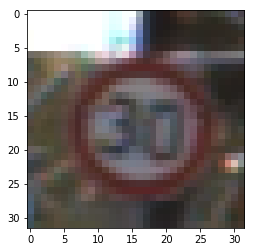

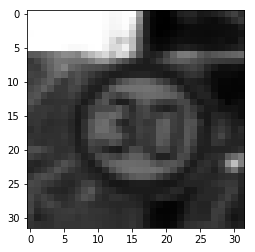

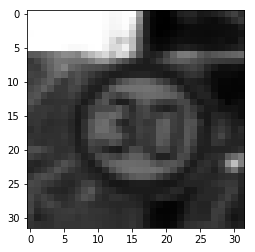

In [24]:
input = 'exploratory_images/label_1.jpg'
name_of_output_image_folder = 'preprocessed_images/'
name = glob.glob(input)
for image in name:
    img = mpimg.imread(image)
    plt.imshow(img)
    plt.show()
    img_name1 = 'graysacle_label_1.jpg'
    img_name2 = 'normalized_graysacle_label_1.jpg'
    path1 = name_of_output_image_folder + img_name1
    path2 = name_of_output_image_folder + img_name2
    img1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.imsave(path1, img1, cmap = 'gray')
    plt.imshow(img1, cmap = 'gray')
    plt.show()
    img2 = normalize_grayscale(img1)
    plt.imsave(path2, img2, cmap = 'gray')
    plt.imshow(img2, cmap = 'gray')
    plt.show()

In [27]:
import csv
# Open the CSV File having Sign Names
name_list = []
with open('signnames.csv', mode ='r')as file:
    # Read the Sign Names
    content = csv.reader(file)
    for sign_names in content:
        name_list.append(sign_names)

print(name_list)

[['ClassId', 'SignName'], ['0', 'Speed limit (20km/h)'], ['1', 'Speed limit (30km/h)'], ['2', 'Speed limit (50km/h)'], ['3', 'Speed limit (60km/h)'], ['4', 'Speed limit (70km/h)'], ['5', 'Speed limit (80km/h)'], ['6', 'End of speed limit (80km/h)'], ['7', 'Speed limit (100km/h)'], ['8', 'Speed limit (120km/h)'], ['9', 'No passing'], ['10', 'No passing for vehicles over 3.5 metric tons'], ['11', 'Right-of-way at the next intersection'], ['12', 'Priority road'], ['13', 'Yield'], ['14', 'Stop'], ['15', 'No vehicles'], ['16', 'Vehicles over 3.5 metric tons prohibited'], ['17', 'No entry'], ['18', 'General caution'], ['19', 'Dangerous curve to the left'], ['20', 'Dangerous curve to the right'], ['21', 'Double curve'], ['22', 'Bumpy road'], ['23', 'Slippery road'], ['24', 'Road narrows on the right'], ['25', 'Road work'], ['26', 'Traffic signals'], ['27', 'Pedestrians'], ['28', 'Children crossing'], ['29', 'Bicycles crossing'], ['30', 'Beware of ice/snow'], ['31', 'Wild animals crossing'], [

2204


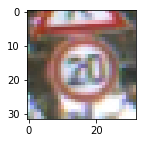

599


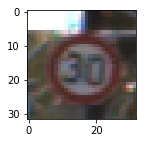

157


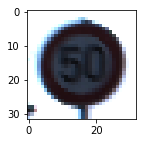

309


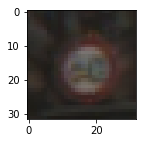

2400


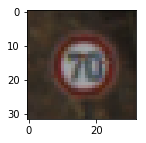

2757


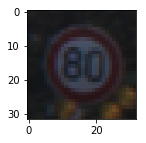

1171


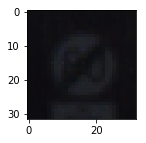

914


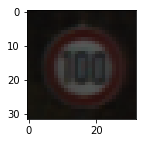

2364


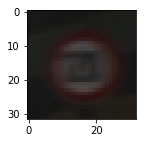

1580


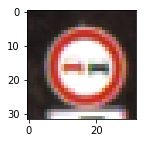

2480


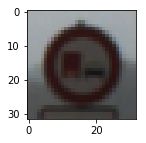

592


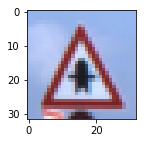

34


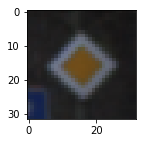

1689


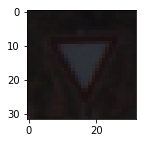

2396


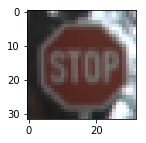

2570


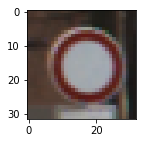

1371


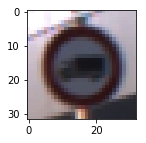

187


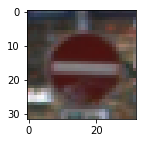

2438


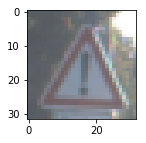

1065


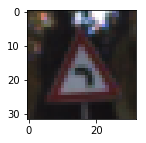

169


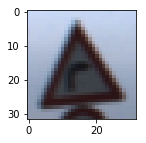

2803


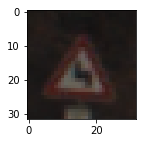

510


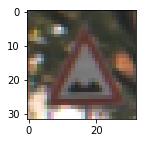

215


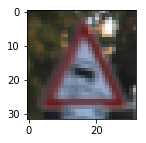

262


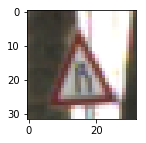

2489


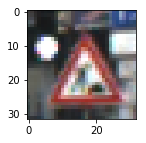

2724


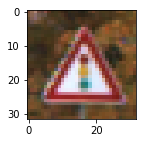

489


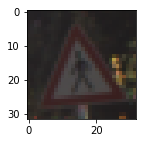

1560


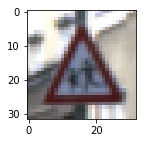

609


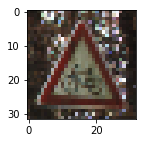

933


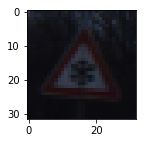

1263


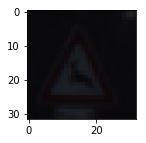

334


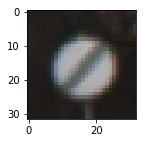

1374


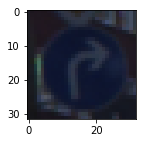

969


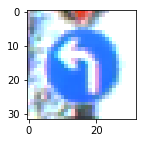

1519


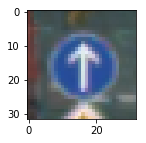

294


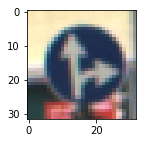

337


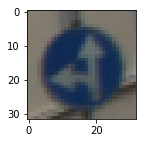

2461


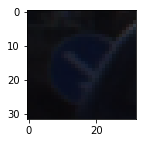

260


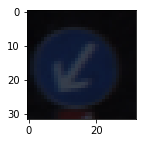

1034


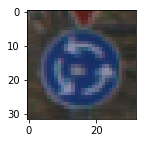

2889


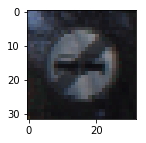

2904


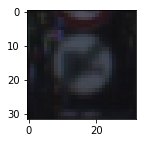

In [42]:
# select a random image from training data 

name_of_output_image_folder = 'exploratory_images/'
for i in range(43):
    index = random.randint(0, len(splitted_X_combined[i]))
    print(index)
    image = splitted_X_combined[i][index].squeeze()
    img_name = 'label_'+ str(i) + '.jpg'
    path = name_of_output_image_folder + img_name
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.show()
    plt.imsave(path, image)    



In [ ]:
   

img_name = img_name.split('/')[1] 
new_img_name = img_name.split('.')[0] + '_undistorted.jpg'
path = name_of_output_image_folder + new_img_name
plt.imsave(path, undist)    
    
#for image in image_list:
#    plt.imshow(image)
#    plt.show()
    
print(index_list)


ClassId SignName
0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vehicles
16 Vehicles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vehicles over 3.5 metric tons


In [ ]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# se matplotlib to visualize the image and print its label and see if the image and the label matches
print(y_train[index])
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()